In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.1.0
Eager execution: True


In [4]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /home/jovyan/.keras/datasets/iris_training.csv


In [6]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [7]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [9]:
batch_size = 32

train_dataset = tf.data.experimental.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

In [10]:
features, labels = next(iter(train_dataset))

print(features)

OrderedDict([('sepal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([5.3, 4.9, 7.4, 6.9, 5. , 5.7, 4.4, 4.6, 5.4, 6.9, 4.9, 4.7, 4.9,
       4.8, 5.7, 4.5, 5.6, 5. , 7.2, 4.6, 6.2, 5.7, 5.1, 5. , 5. , 4.8,
       5.7, 5.8, 5.8, 6.8, 5.7, 5.5], dtype=float32)>), ('sepal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([3.7, 3.1, 2.8, 3.1, 3. , 2.8, 3. , 3.6, 3.9, 3.2, 3. , 3.2, 2.4,
       3.4, 3. , 2.3, 2.5, 3.4, 3. , 3.2, 2.8, 2.8, 2.5, 2.3, 3.5, 3.1,
       4.4, 2.7, 2.8, 3.2, 3.8, 2.6], dtype=float32)>), ('petal_length', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([1.5, 1.5, 6.1, 5.1, 1.6, 4.1, 1.3, 1. , 1.7, 5.7, 1.4, 1.3, 3.3,
       1.6, 4.2, 1.3, 3.9, 1.6, 5.8, 1.4, 4.8, 4.5, 3. , 3.3, 1.6, 1.6,
       1.5, 4.1, 5.1, 5.9, 1.7, 4.4], dtype=float32)>), ('petal_width', <tf.Tensor: shape=(32,), dtype=float32, numpy=
array([0.2, 0.1, 1.9, 2.3, 0.2, 1.3, 0.2, 0.2, 0.4, 2.3, 0.2, 0.2, 1. ,
       0.2, 1.2, 0.3, 1.1, 0.4, 1.6, 0.2, 1.8, 1.3, 1.1, 1. ,

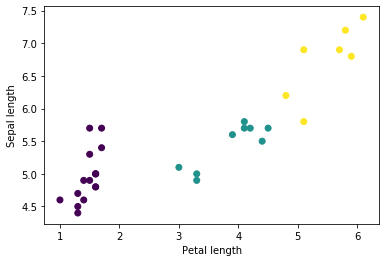

In [11]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [12]:
def pack_features_vector(features, labels):
  """特徴量を1つの配列にパックする"""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [13]:
train_dataset = train_dataset.map(pack_features_vector)

In [14]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.8 3.  5.5 2.1]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [6.4 2.8 5.6 2.1]
 [6.  2.2 5.  1.5]], shape=(5, 4), dtype=float32)


In [15]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [16]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-1.0841056,  1.328224 , -1.1157796],
       [-0.8861383,  1.0479447, -0.8767976],
       [-1.3378998,  1.6430174, -1.3805835],
       [-1.0647235,  1.3257856, -1.115726 ],
       [-1.0616343,  1.2883327, -1.0811117]], dtype=float32)>

In [17]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.0761687 , 0.85003734, 0.07379395],
       [0.1120187 , 0.7749114 , 0.11306993],
       [0.04615932, 0.9096101 , 0.04423052],
       [0.07770414, 0.8484555 , 0.0738404 ],
       [0.08021861, 0.8411101 , 0.07867128]], dtype=float32)>

In [18]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
    Labels: [2 1 2 2 2 0 0 2 0 1 2 0 0 2 2 0 0 2 2 2 1 1 1 0 2 1 1 2 0 2 0 2]


In [19]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [20]:
def loss(model, x, y):
  y_ = model(x)

  return loss_object(y_true=y, y_pred=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))


Loss test: 1.8097361326217651


In [21]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [22]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [23]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels).numpy()))


Step: 0, Initial Loss: 1.8097361326217651
Step: 1,         Loss: 1.59879469871521


In [24]:
## Note: このセルを再実行すると同じモデル変数が使われます

# 結果をグラフ化のために保存
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # 訓練ループ - 32個ずつのバッチを使用
  for x, y in train_dataset:
    # モデルの最適化
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # 進捗の記録
    epoch_loss_avg(loss_value)  # Add current batch loss 現在のバッチの損失を加算
    # 予測ラベルと実際のラベルを比較
    epoch_accuracy(y, model(x))
    
  # エポックの終わり
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.259, Accuracy: 30.000%
Epoch 050: Loss: 0.067, Accuracy: 98.333%
Epoch 100: Loss: 0.057, Accuracy: 97.500%
Epoch 150: Loss: 0.049, Accuracy: 99.167%
Epoch 200: Loss: 0.066, Accuracy: 98.333%


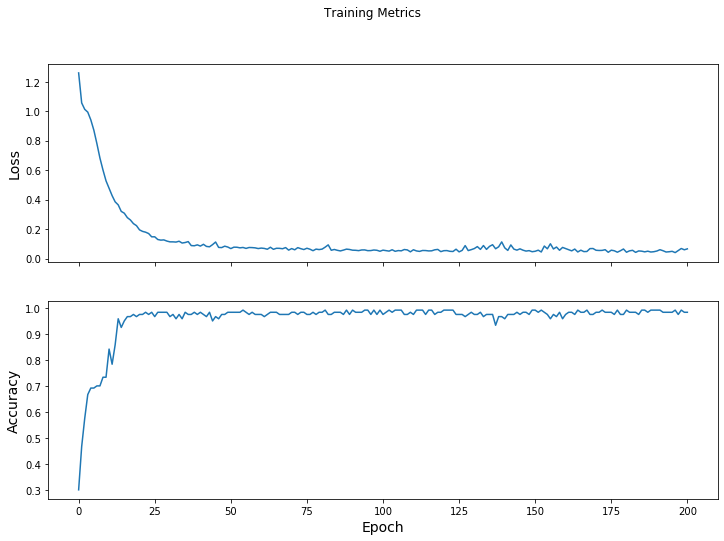

In [25]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [26]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [27]:
test_dataset = tf.data.experimental.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [28]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%


In [29]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 1],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [30]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (99.9%)
Example 1 prediction: Iris versicolor (99.9%)
Example 2 prediction: Iris virginica (98.9%)
